In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


In [3]:
#split 'Start-Time attribute into Year,month,weekday,day,hours and minutes'
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,Night,5,46,2016,2,0,8
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Night,Day,6,7,2016,2,0,8
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Night,Day,Day,6,49,2016,2,0,8
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Night,Day,Day,Day,7,23,2016,2,0,8
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,Day,7,39,2016,2,0,8


In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Minute', 'Year', 'Month', 'Weekday',
       'Day'],
      dtype='object')

In [5]:
#After Exploratory Data Analysis we found that there are few feature that can be dropped based on least significance and redundant atrributes , so that model can be trained on cleaned dataset.
least_Significant_features_to_drop = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", 
                                      "Description", "Number", "Street", "County", "State", "Zipcode", "Country", 
                                      "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop"
                                      , "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
#newSet = df.drop(least_Significant_features_to_drop, axis=1)
df = df.drop(least_Significant_features_to_drop, axis=1)
#newSet.head()
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,L,Reynoldsburg,37.9,100.0,29.65,10.0,...,False,False,False,Night,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,R,Williamsburg,36.0,100.0,29.67,10.0,...,False,False,True,Night,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,R,Dayton,35.1,96.0,29.64,9.0,...,False,False,False,Day,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,R,Dayton,36.0,89.0,29.65,6.0,...,False,False,True,Day,7,39,2016,2,0,8


In [6]:
#Now we will check if data has some duplicates value and remove them from the dataset
print("Total Number of rows:", len(df.index))
#newSet.drop_duplicates(inplace=True)
df.drop_duplicates
print("Total number of rows after removing duplicates:", len(df.index))

Total Number of rows: 4232541
Total number of rows after removing duplicates: 4232541


In [7]:
#Handling incorrect and missing values

In [8]:
#initially looking at the Side column
df["Side"].value_counts()

R    3467079
L     765461
           1
Name: Side, dtype: int64

In [9]:
#the output shows 1 record without Side so that can be dropped
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    3467079
L     765461
Name: Side, dtype: int64

In [10]:
#next looking at visibility and pressure
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4133872.00,4156156.00
mean,9.11,29.69
std,2.82,0.86
min,0.00,0.00
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [11]:
#the output shows min as 0 which informs us that a number of records are missing them and have been replaced with 0
#we are dropping the records with missing values for visibility and pressure

df = df[df["Visibility(mi)"] != 0]
df = df[df["Pressure(in)"] != 0]
df[["Visibility(mi)", "Pressure(in)"]].describe().round(2)

,Visibility(mi),Pressure(in)
count,4131229.00,4153515.00
mean,9.12,29.69
std,2.81,0.86
min,0.06,0.02
25%,10.00,29.64
50%,10.00,29.93
75%,10.00,30.08
max,140.00,58.04


In [12]:
#analyzing the weather conditions
#outputting the total number of different conditions and their names

weather_conditions = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(weather_conditions), "\n")
print(weather_conditions)

Total number of weather conditions:  132 

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' '

In [13]:
#reducing the amount of weather conditions by substituting them with a more common name

df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

common_weather = df["Weather_Condition"].unique()
print("Total number of weather conditions: ", len(common_weather), "\n")
print(common_weather)

Total number of weather conditions:  12 

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' nan 'Smoke' 'Sand' 'Windy' 'Hail'
 'Thunderstorm' 'Tornado']


In [14]:
#after checking the weather conditions, we are analyzing the wind directions
#outputting the total number of different directions and their names

wind_directions = df["Wind_Direction"].unique()
print("Total number of wind directions: ", len(wind_directions), "\n")
print(wind_directions)

Total number of wind directions:  25 

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [15]:
#similarly to weather conditions, we reduce the amount of wind directions by grouping the values

df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df["Wind_Direction"] = df["Wind_Direction"].map(lambda i : i if len(i) != 3 else i[1:], na_action="ignore")
common_direction = df["Wind_Direction"].unique()

print("Total number of wind directions: ", len(common_direction), "\n")
print(common_direction)

Total number of wind directions:  11 

['Calm' 'SW' 'NW' 'W' 'NE' 'S' 'N' 'Variable' 'SE' 'E' nan]


In [16]:
#analyzing the missing values
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Side                       0
City                     137
Temperature(F)         89873
Humidity(%)            95422
Pressure(in)           76381
Visibility(mi)         98667
Wind_Direction         83601
Wind_Speed(mph)       479284
Precipitation(in)    2065296
Weather_Condition      99024
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Civil_Twilight           141
Hour                       0
Minute                     0
Year                       0
Month                      0
Weekday                    0
Day                        0
dtype: int64

In [17]:
#from the output, we identified that many of the records don't contain informations about Precipitation so we will drop that feature
#we fill in the missing features with the mean for numerical features 
#we delete the records with missing informations for categorical features
fill_features = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[fill_features] = df[fill_features].fillna(df[fill_features].mean())
df.dropna(inplace=True)
df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Hour                 0
Minute               0
Year                 0
Month                0
Weekday              0
Day                  0
dtype: int64

In [18]:
#verifying the variance for the features

In [19]:
#verifying the variances to see if we need to eliminate features with a low value

df.describe().round(2)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Hour,Minute,Year,Month,Weekday,Day
count,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00,4116856.00
mean,2.30,36.38,-95.48,0.33,61.51,65.68,29.69,9.12,7.90,0.01,12.14,29.97,2018.45,7.19,2.46,15.91
std,0.53,4.98,17.33,1.59,18.47,22.66,0.86,2.81,5.08,0.11,5.47,17.29,1.33,3.56,1.75,8.70
min,1.00,24.56,-124.62,0.00,-89.00,1.00,0.02,0.06,0.00,0.00,0.00,0.00,2016.00,1.00,0.00,1.00
25%,2.00,33.51,-117.36,0.00,49.30,49.00,29.64,10.00,5.00,0.00,8.00,15.00,2017.00,4.00,1.00,9.00
50%,2.00,35.80,-90.00,0.00,63.00,68.00,29.93,10.00,7.91,0.01,12.00,30.00,2019.00,8.00,2.00,16.00
75%,3.00,40.20,-80.87,0.08,75.00,85.00,30.08,10.00,10.00,0.01,17.00,45.00,2020.00,10.00,4.00,23.00
max,4.00,49.00,-67.11,441.75,189.00,100.00,58.04,140.00,984.00,25.00,23.00,59.00,2020.00,12.00,6.00,31.00


In [20]:
#Encode target labels with value between 0 and n_classes-1
encoder = preprocessing.LabelEncoder()
df['Bump'] = encoder.fit_transform(df['Bump'])
df['Amenity'] = encoder.fit_transform(df['Amenity'])
df['Crossing'] = encoder.fit_transform(df['Crossing'])
df['Give_Way'] = encoder.fit_transform(df['Give_Way'])
df['Junction'] = encoder.fit_transform(df['Junction'])
df['No_Exit'] = encoder.fit_transform(df['No_Exit'])
df['Railway'] = encoder.fit_transform(df['Railway'])
df['Roundabout'] = encoder.fit_transform(df['Roundabout'])
df['Station'] = encoder.fit_transform(df['Station'])
df['Stop'] = encoder.fit_transform(df['Stop'])
df['Traffic_Calming'] = encoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal'] = encoder.fit_transform(df['Traffic_Signal'])
df['City'] = encoder.fit_transform(df['City'])
df['Weather_Condition'] = encoder.fit_transform(df['Weather_Condition'])
df['Wind_Direction'] = encoder.fit_transform(df['Wind_Direction'])
df['Side'] = encoder.fit_transform(df['Side'])
df['Civil_Twilight'] = encoder.fit_transform(df['Civil_Twilight'])

In [21]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
0,3,39.865147,-84.058723,0.01,1,2577,36.9,91.0,29.68,10.0,...,0,0,0,1,5,46,2016,2,0,8
1,2,39.928059,-82.831184,0.01,0,8978,37.9,100.0,29.65,10.0,...,0,0,0,1,6,7,2016,2,0,8
2,2,39.063148,-84.032608,0.01,1,11741,36.0,100.0,29.67,10.0,...,0,0,1,1,6,49,2016,2,0,8
3,3,39.747753,-84.205582,0.01,1,2577,35.1,96.0,29.64,9.0,...,0,0,0,0,7,23,2016,2,0,8
4,2,39.627781,-84.188354,0.01,1,2577,36.0,89.0,29.65,6.0,...,0,0,1,0,7,39,2016,2,0,8


/Users/sabrinadhaliwal/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


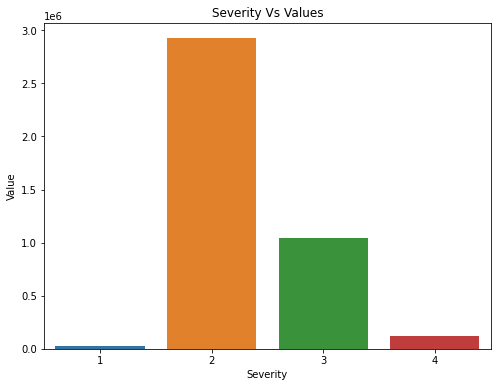

In [22]:
severityCount = df['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [23]:
#Data distribution is not uniform, we number of records for each severity

In [24]:
size1 = len(df[df["Severity"]==1].index)
print('No. of rows in Severity 1: ',size1 )
size2 = len(df[df["Severity"]==2].index)
print('No. of rows in Severity 2: ',size2)
size3 = len(df[df["Severity"]==3].index)
print('No. of rows in Severity 3: ',size3)
size4 = len(df[df["Severity"]==4].index)
print('No. of rows in Severity 4: ',size4)

No. of rows in Severity 1:  28718
No. of rows in Severity 2:  2925644
No. of rows in Severity 3:  1043246
No. of rows in Severity 4:  119248


In [25]:
X = pd.DataFrame()
#We take all the records for severity 1
for i in range(1,2):
    S = df[df['Severity']==i]
    temp = S.sample(size1, random_state=42)
    X = X.append(temp)

In [26]:
#We take all the records for severity 4
for i in range(4,5):
    S = df[df['Severity']==i]
    temp = S.sample(size4, random_state=42)
    X = X.append(temp)

In [27]:
#We take all the records for severity 3 & same size of records for severity 2
for i in range(2,4):
    S = df[df['Severity']==i]
    temp = S.sample(size3, random_state=42)
    X = X.append(temp)

/Users/sabrinadhaliwal/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


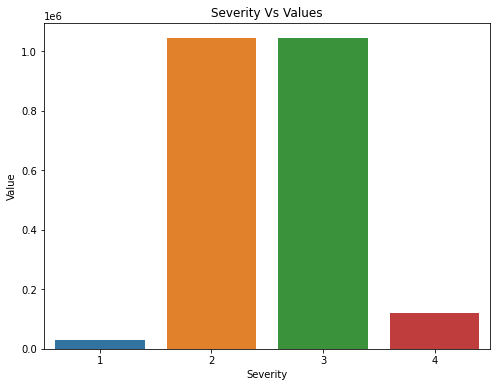

In [28]:
severityCount = X['Severity'].value_counts()
plt.figure(figsize=(8, 6))
plt.title("Severity Vs Values")
sns.barplot(severityCount.index, severityCount.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [29]:
print("Size of data taken for analysis ", X.shape)
X.columns

Size of data taken for analysis  (2234458, 33)


Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day'],
      dtype='object')

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresForScaling = ['Start_Lat', 'Start_Lng','Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)','Hour', 'Minute',
       'Year', 'Month', 'Weekday', 'Day', 'City', 'Wind_Direction', 'Weather_Condition']
X[featuresForScaling] = scaler.fit_transform(X[featuresForScaling])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Hour,Minute,Year,Month,Weekday,Day
3608693,1,0.550071,0.043328,0.000000,1,0.180768,0.492806,0.676768,0.516201,0.07103,...,0,0,0,1,0.000000,0.661017,1.0,0.272727,0.500000,0.033333
3557570,1,0.317206,0.235195,0.000000,1,0.904255,0.672662,0.030303,0.465701,0.07103,...,0,0,1,0,0.826087,0.322034,1.0,0.454545,0.666667,0.600000
3598039,1,0.315379,0.237577,0.000007,0,0.904255,0.507194,0.383838,0.467942,0.07103,...,0,0,1,0,0.478261,0.711864,1.0,0.181818,0.666667,0.866667
3511994,1,0.462211,0.773903,0.000000,1,0.886386,0.618705,0.494949,0.502068,0.07103,...,0,0,0,0,0.652174,0.254237,1.0,0.454545,0.333333,0.766667
3583845,1,0.514955,0.044404,0.000000,1,0.508644,0.510791,0.686869,0.519304,0.07103,...,0,0,0,0,0.391304,0.406780,1.0,0.181818,0.666667,0.633333


In [31]:
#categoryFeatures = set(["Side","Weather_Condition", "Wind_Direction", "Civil_Twilight"])
#for cat in categoryFeatures:
 #   X[cat] = X[cat].astype("category")
#for cat in categoryFeatures:
 #   size = len(X[cat].unique())
  #  print("Category: "+cat+"  Count:" +str(size)) 

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234458 entries, 3608693 to 341042
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   Side               int64  
 5   City               float64
 6   Temperature(F)     float64
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Visibility(mi)     float64
 10  Wind_Direction     float64
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
 13  Weather_Condition  float64
 14  Amenity            int64  
 15  Bump               int64  
 16  Crossing           int64  
 17  Give_Way           int64  
 18  Junction           int64  
 19  No_Exit            int64  
 20  Railway            int64  
 21  Roundabout         int64  
 22  Station            int64  
 23  Stop               int64  
 24  Traffic_Calming    int64  
 25  Traffic_Signa

In [34]:
#X = pd.get_dummies(X, columns=categoryFeatures, drop_first=True)
#X.head()

In [35]:
#Decision Tree
sampleSet = X
Y = sampleSet["Severity"]
X_sample = sampleSet.drop("Severity", axis=1)

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1675843, 32) (1675843,)
(558615, 32) (558615,)


In [40]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier
parameter = [{"criterion":["gini", "entropy"], "max_depth": [5,10,15,30]}]

#cross-validated grid-search
grid = GridSearchCV(clf,parameter,verbose = 5,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  40 | elapsed:  2.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:  3.1min remaining:   26.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.5min finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=5)

In [42]:
#Print parameter score
print("Parameter score using GridSearchCV in sklearn")
print("Parameter score: ",grid.best_params_)
print("Training score: ",grid.score(X_train, y_train))
print("Test score: ",grid.score(X_test, y_test))

Parameter score using GridSearchCV in sklearn
Parameter score:  {'criterion': 'gini', 'max_depth': 30}
Training score:  0.9652718064878393
Test score:  0.7867260993707652


In [43]:
#Print parameter score
print("Scoring only using the decision tree classifier")
clf.fit(X_train,y_train)
print("Training score: ",clf.score(X_train, y_train))
print("Test score: ",clf.score(X_test, y_test))

Scoring only using the decision tree classifier
Training score:  0.9992660410312899
Test score:  0.7785952758160808


In [41]:
#Gaussian Naive Bayes classfier

from sklearn.naive_bayes import  GaussianNB
gausNaiveB = GaussianNB()
gausNaiveB.fit(X_train, y_train)

print("Training score:", gausNaiveB.score(X_train, y_train))
print("Validation score:", gausNaiveB.score(X_test, y_test))

Training score: 0.5677059247196784
Validation score: 0.5676324481082677


In [45]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
y_pred_nb = gausNaiveB.predict(X_test)

print(classification_report(y_train, gausNaiveB.predict(X_train)))
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.15      0.42      0.22     21549
           2       0.78      0.29      0.42    782439
           3       0.55      0.90      0.68    782340
           4       0.23      0.10      0.14     89515

    accuracy                           0.57   1675843
   macro avg       0.43      0.43      0.37   1675843
weighted avg       0.64      0.57      0.53   1675843

              precision    recall  f1-score   support

           1       0.15      0.41      0.22      7169
           2       0.78      0.29      0.42    260807
           3       0.55      0.90      0.68    260906
           4       0.23      0.10      0.14     29733

    accuracy                           0.57    558615
   macro avg       0.43      0.43      0.37    558615
weighted avg       0.64      0.57      0.53    558615



In [46]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy of NB:",metrics.accuracy_score(y_test, y_pred_nb))


Accuracy of NB: 0.5676324481082677


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_Forest = RandomForestClassifier(n_jobs=-1, random_state=42)
grid = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
clf_rand_For = GridSearchCV(rand_Forest, grid, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(clf_rand_For.best_params_)
print("Train score:", clf_rand_For.score(X_train, y_train))
print("Validation score:", clf_rand_For.score(X_test, y_test))

In [ ]:

rand_Forest.fit(X_train,y_train)

y_pred_rand_Forest=rand_Forest.predict(X_test)



In [ ]:

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_rand_Forest))  
print(classification_report(y_test, y_pred_rand_Forest))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rand_Forest))


In [ ]:
#Support Vector Machines

In [33]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [35]:
param = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [.2, .5, .8, 1.]}, 
         {"kernel": ["poly"], "C": [.2, .5, .8, 1.], "degree": [2, 3, 4]}]

svm_svc = svm.SVC(verbose=5, random_state=42)
grid_search = GridSearchCV(svm_svc, param, verbose=5, n_jobs=-1)

x, x_test = train_test_split(X, test_size=.2, random_state=42)
print("train test split: ", x.shape, x_test.shape)

train test split:  (1787566, 33) (446892, 33)


In [36]:
smpl = x.sample(5_000, random_state=42)
y_smpl = smpl["Severity"]
x_smpl = smpl.drop("Severity", axis=1)
grid_search.fit(x_smpl, y_smpl)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LibSVM]

GridSearchCV(estimator=SVC(random_state=42, verbose=5), n_jobs=-1,
             param_grid=[{'C': [0.2, 0.5, 0.8, 1.0],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.2, 0.5, 0.8, 1.0], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=5)

In [37]:
print("top scores of parameters:", grid_search.best_params_)
print("train score:", grid_search.score(x_smpl, y_smpl))

top scores of parameters: {'C': 1.0, 'degree': 3, 'kernel': 'poly'}
train score: 0.6798


In [38]:
print("default scores:", svm_svc.fit(x_smpl, y_smpl))
print("train score:", svm_svc.score(x_smpl, y_smpl))

[LibSVM]default scores: SVC(random_state=42, verbose=5)
train score: 0.6698


In [39]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = "rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,1.712147,0.020257,0.199806,0.034298,1.0,poly,3,"{'C': 1.0, 'degree': 3, 'kernel': 'poly'}",0.672,0.657,0.643,0.679,0.660,0.6622,0.012480,1
19,1.692738,0.027983,0.188795,0.007007,0.8,poly,3,"{'C': 0.8, 'degree': 3, 'kernel': 'poly'}",0.672,0.657,0.640,0.671,0.659,0.6598,0.011617,2
16,1.342849,0.027113,0.162074,0.005268,0.5,poly,3,"{'C': 0.5, 'degree': 3, 'kernel': 'poly'}",0.670,0.657,0.637,0.668,0.661,0.6586,0.011775,3
14,1.344860,0.026677,0.160322,0.002865,0.2,poly,4,"{'C': 0.2, 'degree': 4, 'kernel': 'poly'}",0.666,0.654,0.641,0.672,0.660,0.6586,0.010651,3
17,1.537278,0.007793,0.171000,0.006658,0.5,poly,4,"{'C': 0.5, 'degree': 4, 'kernel': 'poly'}",0.669,0.649,0.640,0.680,0.653,0.6582,0.014386,5
10,1.507706,0.039754,0.948922,0.048407,1.0,rbf,NaN,"{'C': 1.0, 'kernel': 'rbf'}",0.663,0.654,0.636,0.667,0.662,0.6564,0.011038,6
7,1.757667,0.114204,1.041905,0.039067,0.8,rbf,NaN,"{'C': 0.8, 'kernel': 'rbf'}",0.661,0.655,0.634,0.666,0.660,0.6552,0.011161,7
4,1.432450,0.008704,0.978350,0.031659,0.5,rbf,NaN,"{'C': 0.5, 'kernel': 'rbf'}",0.657,0.654,0.635,0.672,0.656,0.6548,0.011788,8
18,1.504733,0.040013,0.183463,0.020900,0.8,poly,2,"{'C': 0.8, 'degree': 2, 'kernel': 'poly'}",0.659,0.649,0.634,0.670,0.660,0.6544,0.012175,9
13,1.326968,0.036021,0.161310,0.002999,0.2,poly,3,"{'C': 0.2, 'degree': 3, 'kernel': 'poly'}",0.663,0.651,0.631,0.668,0.659,0.6544,0.012955,9


In [40]:
smpl = x.sample(10_000, random_state = 42)
y_smpl = smpl["Severity"]
x_smpl = smpl.drop("Severity", axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_smpl, y_smpl, test_size = .2, random_state = 42)

In [41]:
print("train: ", x_train.shape, y_train.shape)
print("validation: ", x_val.shape, y_val.shape)

train:  (8000, 32) (8000,)
validation:  (2000, 32) (2000,)


In [42]:
svm_svc = svm.SVC(**grid_search.best_params_, random_state = 42)
svm_svc.fit(x_train, y_train)

SVC(kernel='poly', random_state=42)

In [43]:
print("train: ", svm_svc.score(x_train, y_train))
print("validation: ", svm_svc.score(x_val, y_val))

train:  0.6805
validation:  0.656
